In [8]:
import os, shutil
original_dataset_dir = 'kaggle_original_data'
base_dir = 'cats_and_dogs_small'
#os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print(len(os.listdir(train_cats_dir)))

1000


In [1]:
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

In [46]:
train_generator=data_generator.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode='binary')
test_generator=data_generator.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary')
val_generator=data_generator.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 32)       

In [50]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [51]:
model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=val_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 158s 2s/step - loss: 9.1793 - accuracy: 0.5065 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 157s 2s/step - loss: 0.7281 - accuracy: 0.5075 - val_loss: 0.6965 - val_accuracy: 0.5010
Epoch 3/30
100/100 [==============================] - 153s 2s/step - loss: 0.7132 - accuracy: 0.5040 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 4/30
100/100 [==============================] - 150s 1s/step - loss: 0.7052 - accuracy: 0.5175 - val_loss: 0.6888 - val_accuracy: 0.5020
Epoch 5/30
100/100 [==============================] - 152s 2s/step - loss: 0.6902 - accuracy: 0.5515 - val_loss: 0.6764 - val_accuracy: 0.5070
Epoch 6/30
100/100 [==============================] - 154s 2s/step - loss: 0.6805 - accuracy: 0.5705 - val_loss: 0.6954 - val_accuracy: 0.5580
Epoch 7/30
100/100 [==============================] - 152s 2s/step - loss: 0.6578 - accuracy: 0.5990 - val_loss: 0.6836 - val_accuracy: 0.5870

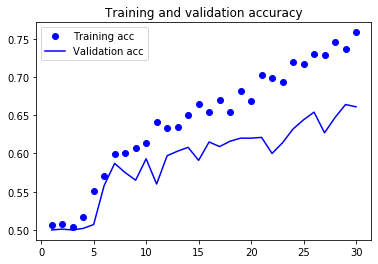

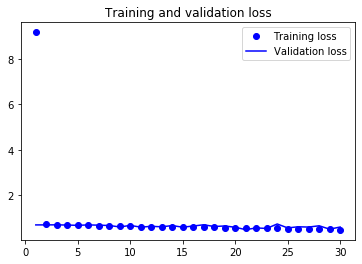

In [54]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [53]:
model.history.history

{'val_loss': [0.6951071619987488,
  0.6965163946151733,
  0.6981788873672485,
  0.688797116279602,
  0.6763991117477417,
  0.6953529715538025,
  0.6835817098617554,
  0.6686996817588806,
  0.6061222553253174,
  0.6719479560852051,
  0.5969291925430298,
  0.6323009729385376,
  0.6124054193496704,
  0.6648203134536743,
  0.5948404669761658,
  0.6461597681045532,
  0.7016350626945496,
  0.6247676610946655,
  0.6483319997787476,
  0.5915566682815552,
  0.48691409826278687,
  0.5620534420013428,
  0.5395782589912415,
  0.7363883256912231,
  0.5631407499313354,
  0.6131221055984497,
  0.6000529527664185,
  0.6575124263763428,
  0.5066499710083008,
  0.6030771136283875],
 'val_accuracy': [0.5,
  0.5009999871253967,
  0.5,
  0.5019999742507935,
  0.5070000290870667,
  0.5580000281333923,
  0.5870000123977661,
  0.574999988079071,
  0.5649999976158142,
  0.5929999947547913,
  0.5600000023841858,
  0.597000002861023,
  0.6029999852180481,
  0.6079999804496765,
  0.5910000205039978,
  0.615000009

In [3]:
from keras.applications import VGG16
import numpy as np

In [4]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [73]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size=20
def extract_features(directory,sample_count):
    features=np.zeros((sample_count,4,4,512))
    labels=np.zeros((sample_count))
    generator = datagen.flow_from_directory(
    directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [93]:
x=train_features.reshape((2000,4*4*512))
x_val=validation_features.reshape((1000,4*4*512))
test_features.reshape((1000,4*4*512))
train_features.shape

(2000, 8192)

In [86]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [94]:
model.fit(x,train_labels,batch_size=20,epochs=20,validation_data=(x_val,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/20
2000/2000 [==============================] - 5s 2ms/step - loss: 4.5543 - accuracy: 0.9165 - val_loss: 3.8821 - val_accuracy: 0.9120
Epoch 2/20
2000/2000 [==============================] - 3s 2ms/step - loss: 1.3723 - accuracy: 0.9550 - val_loss: 0.5930 - val_accuracy: 0.9720
Epoch 3/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6977 - accuracy: 0.9685 - val_loss: 0.7384 - val_accuracy: 0.9690
Epoch 4/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3638 - accuracy: 0.9825 - val_loss: 0.7450 - val_accuracy: 0.9610
Epoch 5/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.9845 - val_loss: 0.6949 - val_accuracy: 0.9670
Epoch 6/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0969 - accuracy: 0.9910 - val_loss: 1.0230 - val_accuracy: 0.9630
Epoch 7/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2276 - acc

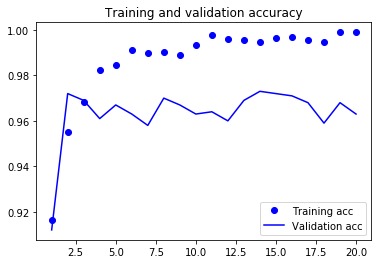

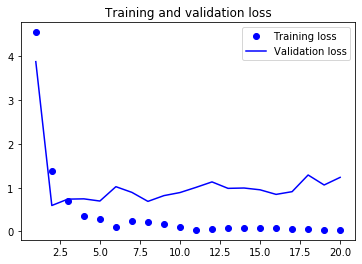

In [95]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [96]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
conv_base.trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from keras.optimizers import RMSprop

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=40,height_shift_range=0.2,width_shift_range=0.2,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode='binary')
val_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer=RMSprop(2e-5),metrics=['accuracy'])

model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=(val_generator),validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 357s 4s/step - loss: 2.3936 - accuracy: 0.7485 - val_loss: 1.2280 - val_accuracy: 0.9100
Epoch 2/20
100/100 [==============================] - 381s 4s/step - loss: 0.9064 - accuracy: 0.8710 - val_loss: 0.9790 - val_accuracy: 0.9330
Epoch 3/20
100/100 [==============================] - 367s 4s/step - loss: 0.7739 - accuracy: 0.8950 - val_loss: 9.2742e-07 - val_accuracy: 0.9450
Epoch 4/20
100/100 [==============================] - 370s 4s/step - loss: 0.5818 - accuracy: 0.9125 - val_loss: 7.9105e-08 - val_accuracy: 0.9480
Epoch 5/20
100/100 [==============================] - 371s 4s/step - loss: 0.5619 - accuracy: 0.9195 - val_loss: 4.6089e-04 - val_accuracy: 0.9540
Epoch 6/20
100/100 [==============================] - 388s 4s/step - loss: 0.4661 - accuracy: 0.9265 - val_loss: 0.3077 - val_accuracy: 0.9560
Epoch 7/20
100/100 [==========================

In [ ]:
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainnable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False